# Introduction 

In the following notebook, I will be exploring a cleaned version of the weather_features.csv file.

* Raw data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/01_Raw_Data)
* Cleaned data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/02_Cleaned_Data)

**Read in libraries for notebook**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Set notebook preferences**

In [3]:
#Set preferences for pandas 
pd.set_option("display.max_columns", 101)

#Set style for visualizations
plt.style.use('Solarize_Light2')

**Read in data**

In [4]:
#Set path to raw data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather'

#Read in raw data
df = pd.read_csv(path + '/Data/02_Cleaned_Data/2020_0505_Cleaned_Weather_Features.csv', index_col='dt_iso')

# Data Overview

**Data Dictionary**

* *dt_isodatetime* index localized to CET
* *city_name*: name of city
* *temp*: in f
* *temp_min*: minimum in f
* *temp_max*: maximum in f
* *pressure*: pressure in hPa
* *humidity*: humidity in %
* *wind_speed*: wind speed in m/s
* *wind_deg*: wind direction
* *rain_1h*: rain in last hour in mm
* *rain_3h*: rain last 3 hours in mm
* *snow_3h*: show last 3 hours in mm
* *clouds_all*: cloud cover in %
* *weather_main*: Short description of current weather

**Data Preview**

In [5]:
#Print df shape
print('Shape of data:', df.shape)

#View head
df.head()

Shape of data: (178375, 13)


,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_main
dt_iso,,,,,,,,,,,,,
2015-01-01 00:00:00,Valencia,27.1850,27.1850,27.1850,1001,77,1,62,0.0,0.0,0.0,0,clear
2015-01-01 01:00:00,Valencia,27.1850,27.1850,27.1850,1001,77,1,62,0.0,0.0,0.0,0,clear
2015-01-01 02:00:00,Valencia,25.7648,25.7648,25.7648,1002,78,0,23,0.0,0.0,0.0,0,clear
2015-01-01 03:00:00,Valencia,25.7648,25.7648,25.7648,1002,78,0,23,0.0,0.0,0.0,0,clear
2015-01-01 04:00:00,Valencia,25.7648,25.7648,25.7648,1002,78,0,23,0.0,0.0,0.0,0,clear


**About the data**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178375 entries, 2015-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   city_name     178375 non-null  object 
 1   temp          178375 non-null  float64
 2   temp_min      178375 non-null  float64
 3   temp_max      178375 non-null  float64
 4   pressure      178375 non-null  int64  
 5   humidity      178375 non-null  int64  
 6   wind_speed    178375 non-null  int64  
 7   wind_deg      178375 non-null  int64  
 8   rain_1h       178375 non-null  float64
 9   rain_3h       178375 non-null  float64
 10  snow_3h       178375 non-null  float64
 11  clouds_all    178375 non-null  int64  
 12  weather_main  178375 non-null  object 
dtypes: float64(6), int64(5), object(2)
memory usage: 19.1+ MB


In [7]:
#Sum of missing values per column
df.describe()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
count,178375.000000,178375.000000,178375.000000,1.783750e+05,178375.000000,178375.000000,178375.000000,178375.000000,178375.000000,178375.000000,178375.000000
mean,61.643440,59.324837,64.294208,1.069267e+03,68.422733,2.470688,166.592555,0.075499,0.000379,0.004763,25.075302
std,14.447722,14.320401,15.503006,5.969983e+03,21.903495,2.095956,116.610753,0.398870,0.007285,0.222617,30.774908
min,12.362000,12.362000,12.362000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.936000,48.799400,52.700000,1.013000e+03,53.000000,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000
50%,60.800000,59.000000,62.600000,1.018000e+03,72.000000,2.000000,177.000000,0.000000,0.000000,0.000000,20.000000
75%,71.600000,69.045800,75.200000,1.022000e+03,87.000000,4.000000,270.000000,0.000000,0.000000,0.000000,40.000000
max,108.410000,107.600000,118.400000,1.008371e+06,100.000000,133.000000,360.000000,12.000000,2.315000,21.500000,100.000000


**Data Distributions**

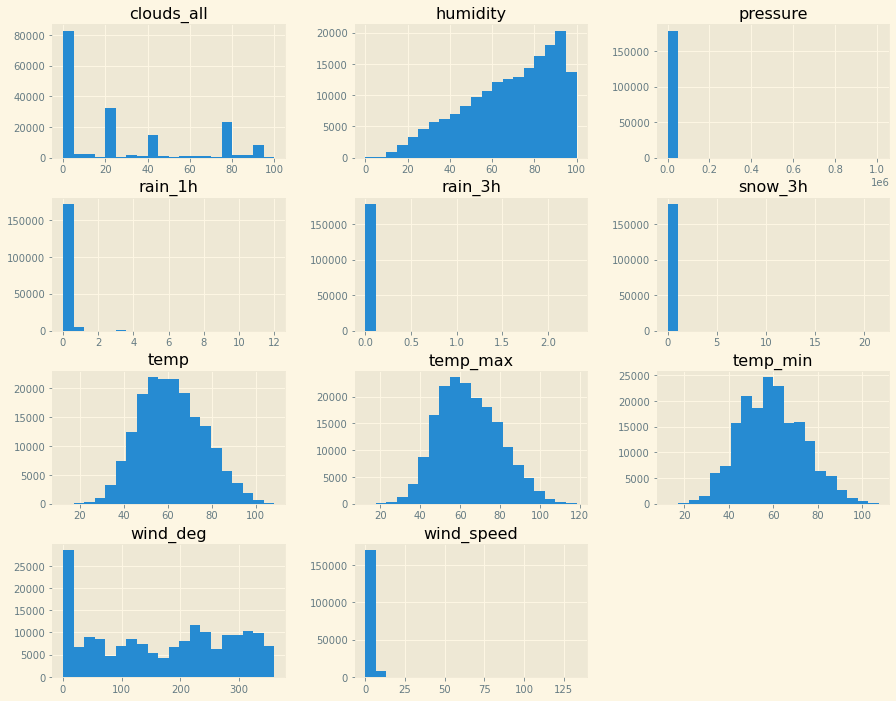

In [8]:
df.hist(figsize=(15,12), bins = 20);

# Exploratory Data Analysis

## Time plot of temperatures across all of spain

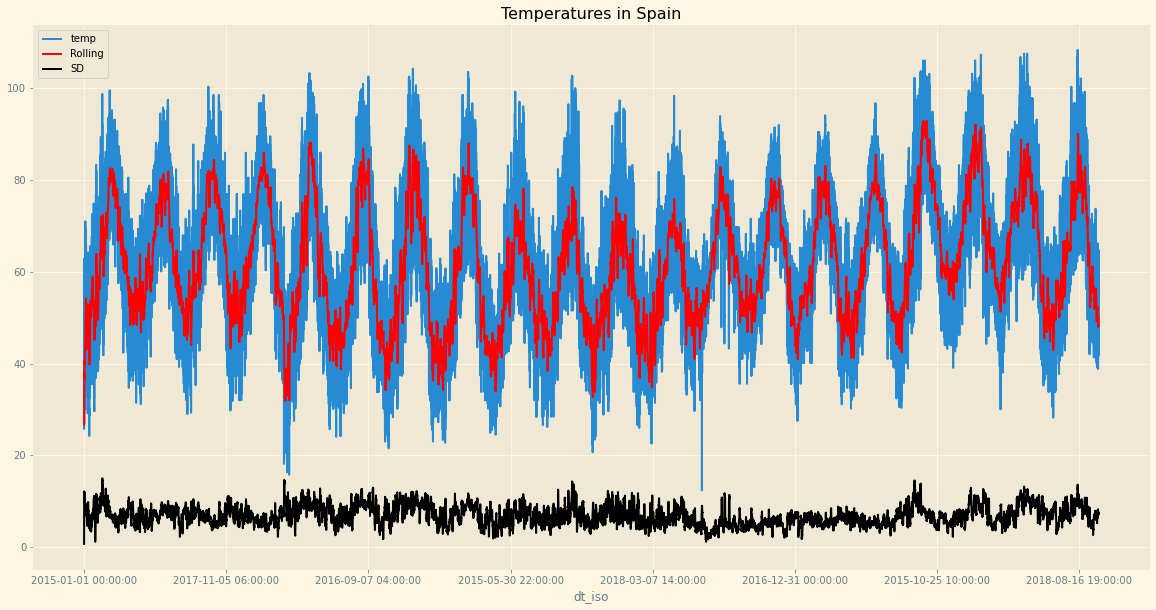

In [9]:
#Set figure
fig, ax = plt.subplots(figsize = (20,10))

#Plot data
j = df.temp.plot(ax=ax)
df.temp.rolling(window = 120, min_periods=7).mean().plot(color = 'r', label = 'Rolling')
df.temp.rolling(window = 120, min_periods=7).std().plot(color = 'black', label = 'SD')

###Set plot aesthetics###
#Title
j.set_title('Temperatures in Spain')
j.legend()

## Time series in specific cities

In [10]:
df.city_name.sort_values().unique()

array(['Barcelona', 'Bilbao', 'Madrid', 'Seville', 'Valencia'],
      dtype=object)

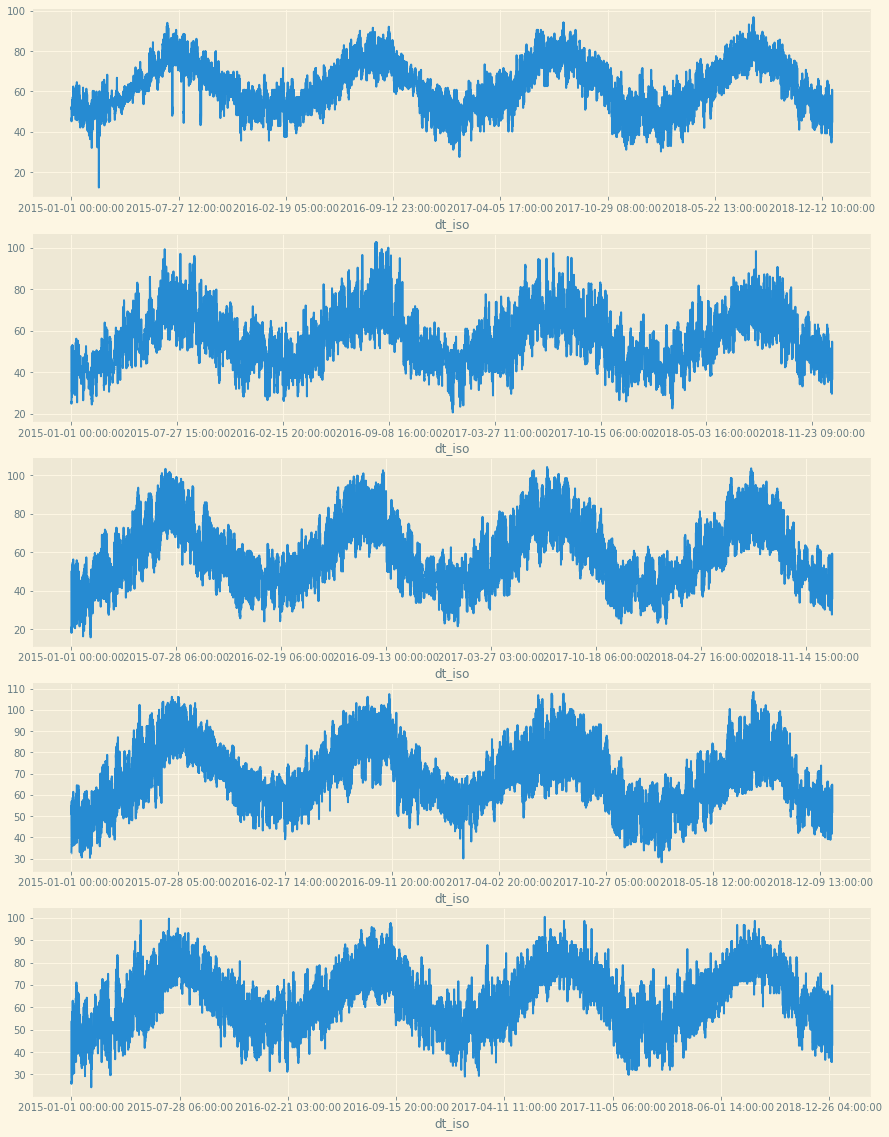

In [11]:
#Set figure
fig, axes = plt.subplots(5,1,figsize = (15,20))

#Plot Barcelona', 'Bilbao', 'Madrid', 'Seville', 'Valencia'
df.loc[df.city_name == 'Barcelona'].temp.plot(ax = axes[0])
df.loc[df.city_name == 'Bilbao'].temp.plot(ax = axes[1])
df.loc[df.city_name == 'Madrid'].temp.plot(ax = axes[2])
df.loc[df.city_name == 'Seville'].temp.plot(ax = axes[3])
df.loc[df.city_name == 'Valencia'].temp.plot(ax = axes[4])